<strong>Maximum Likelihood Estimation</strong> is a technique used to estimate parameters of a given distribution, using observed data.

We try to find sigma.
Keeping theta and sigma fixed, we find the probability.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import scipy as sc
from scipy.stats import norm

In [2]:
N = 100
X1 = np.random.uniform(0,30, N)
X2 =  np.random.normal(10.0, 1.0, N)

np.amax(X2)

12.95370443942036

In [3]:
X = np.transpose(np.array([X1,X2]))
theta0 = 4
theta1 = 3
theta2 = 3
y = 4 + 3*X1 + 3*X2 


fig1 = plt.figure()
# plt.plot(X1,X2,y)

<Figure size 432x288 with 0 Axes>

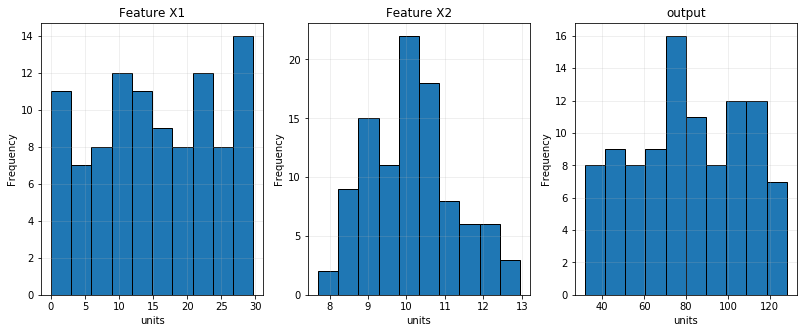

In [4]:
fig1, ax = plt.subplots(1,2)

fig1.set_figheight(5)
fig1.set_figwidth(15)

fig1.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

plt1.hist(X1, label='X1', edgecolor='black')
plt1.set_title('Feature X1')
plt1.set_xlabel('units')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

plt2.hist(X2, label='X2', edgecolor='black')
plt2.set_title('Feature X2')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

plt3.hist(y, label='f(x) = y', edgecolor='black')
plt3.set_title('output')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

plt.show()


In [5]:
def normal_pdf(xval, mu, sigma):       
    if mu == 0:
        mu = np.mean(xval)
    if sigma == 0:
        sigma = np.std(xval)
    arr_pdf = []
    for x in xval:       
        pdf = (1/(sigma*(np.sqrt(2*np.math.pi)))) * np.exp(-((np.power((x - mu),2))/(2*np.power(sigma,2))))
        arr_pdf = np.append(arr_pdf, pdf)    
    return arr_pdf    

def normal_pdf_exp(xval, mu, sigma):   
   mu = np.mean(xval)
   sigma = np.std(xval)
   arr_pdf = []
   for x in xval:       
       pdf = np.exp(-((np.power((x - mu),2))/(2*np.power(sigma,2))))
       arr_pdf = np.append(arr_pdf, pdf)    
   return arr_pdf 

def normal_pdf_singleval(xval, mu, sigma):      
    return (1/(sigma*(np.sqrt(2*np.math.pi)))) * np.exp(-((np.power((xval - mu),2))/(2*np.power(sigma,2))))
      



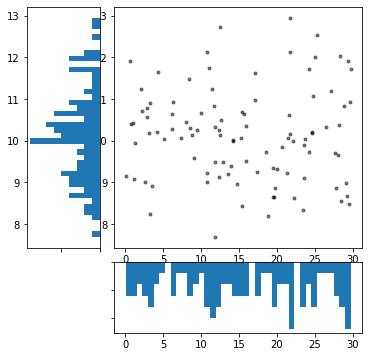

In [6]:
#Plot uniform vs normally distributed data
# Set up the axes with gridspec
fig4 = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig4.add_subplot(grid[:-1, 1:])
y_hist = fig4.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig4.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(X1, X2, 'ko', markersize=3, alpha=0.5)

# histogram on the attached axes
x_hist.hist(X1, 40, histtype='stepfilled', orientation='vertical')
x_hist.invert_yaxis()

y_hist.hist(X2, 40, histtype='stepfilled',
            orientation='horizontal')
y_hist.invert_xaxis()


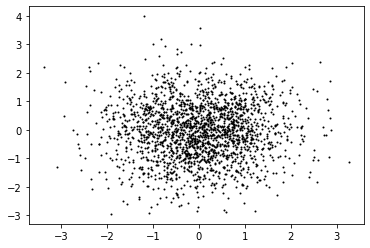

In [7]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean, cov, 2000).T
fig = plt.figure()
plt.plot(x,y,'ko', markersize=1)

Sum of probabilities of all data points, subplot 2  25.0
Sum of probabilities of all data points, subplot 3  25.0


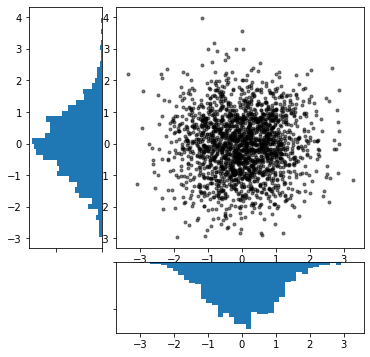

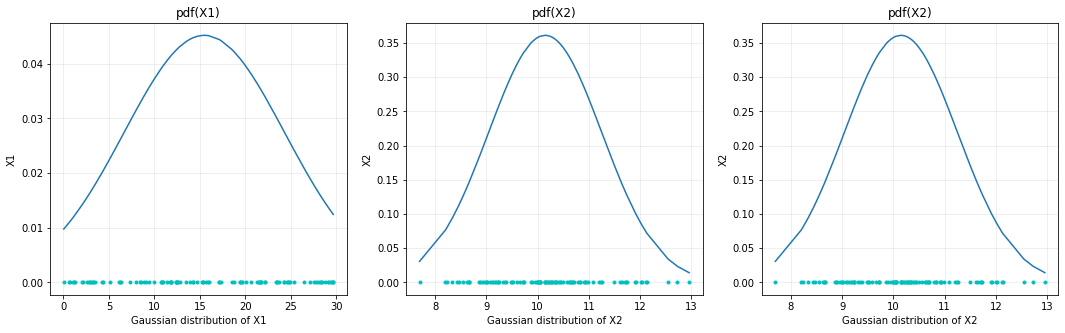

In [8]:
# Set up the axes with gridspec
fig4 = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig4.add_subplot(grid[:-1, 1:])
y_hist = fig4.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig4.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

### scatter points on the main axes
main_ax.plot(x, y, 'ko', markersize=3, alpha=0.5)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal')
y_hist.invert_xaxis()


fig1, ax = plt.subplots(1,3)
fig1.set_figheight(5)
fig1.set_figwidth(20)
fig1.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)



norm_dist_x1 = normal_pdf(X1,0,0)
norm__dis_x1 = np.linalg.norm(X1)

zip_x1_norm_dist = zip(X1, norm_dist_x1)
zip_x1_norm_dist = np.array(sorted(zip_x1_norm_dist))
plt1.grid(axis='both', alpha=.25)
plt1.plot(zip_x1_norm_dist[:,0], zip_x1_norm_dist[:,1], '-')
plt1.plot(zip_x1_norm_dist[:,0], np.zeros(len(X1)), 'c.')
plt1.set_xlabel('Gaussian distribution of X1')
plt1.set_ylabel('X1')
plt1.set_title('pdf(X1)')

norm_dist_x2 = normal_pdf(X2+.5,0,0)
zip_x2_norm_dist = zip(X2, norm_dist_x2)
zip_x2_norm_dist = np.array(sorted(zip_x2_norm_dist))
print('Sum of probabilities of all data points, subplot 2 ', np.round(np.sum( zip_x2_norm_dist[:,1])))

plt2.grid(axis='both', alpha=.25)
plt2.plot(zip_x2_norm_dist[:,0], zip_x2_norm_dist[:,1], '-')
plt2.plot(zip_x2_norm_dist[:,0], np.zeros(len(X2)), 'c.')
plt2.set_xlabel('Gaussian distribution of X2')
plt2.set_ylabel('X2')
plt2.set_title('pdf(X2)')

mean_X2 = np.mean(X2) 
sigma_X2 = np.std(X2) + 1.5
norm_dist_x2 = normal_pdf(X2,0,0)
zip_x2_norm_dist = zip(X2, norm_dist_x2)
zip_x2_norm_dist = np.array(sorted(zip_x2_norm_dist))
print('Sum of probabilities of all data points, subplot 3 ', np.round(np.sum( zip_x2_norm_dist[:,1])))

plt3.grid(axis='both', alpha=.25)
plt3.plot(zip_x2_norm_dist[:,0], zip_x2_norm_dist[:,1], '-')
plt3.plot(zip_x2_norm_dist[:,0], np.zeros(len(X2)), 'c.')
plt3.set_xlabel('Gaussian distribution of X2')
plt3.set_ylabel('X2')
plt3.set_title('pdf(X2)')

plt.show()

In [9]:
X_temprature = []
for i in np.arange(5, 12, 1):    
    #X_temprature.append(list(i*365 + np.random.randint(1,360, 30)))
    X_temprature.append(list(i*7+ np.random.normal(0.0,2.0,int(N))*10))
    #X_temprature.append(list(i*365 + np.sort(np.abs(np.random.normal(0.0,1.0,100)*100))))
    
X_temprature = np.transpose(X_temprature)

np.savetxt('temprature.csv', X_temprature, delimiter = ',', fmt='%d')

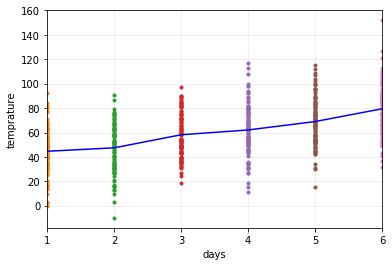

In [10]:
data_csv = np.loadtxt('temprature.csv',delimiter = ',')
data = data_csv
fig3 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
for i in np.arange(5, 5+data_csv.shape[1]):    
    plt.plot(np.repeat(i-5, len(data_csv[:,i-5])),data_csv[:,i-5],'.')
    plt.xlabel('days')
    plt.xlim(1, 6)
    plt.ylabel('temprature')


data_y = np.mean(data_csv,axis = 0)
data_x = np.arange(data_csv.shape[1])
plt.plot(data_x, data_y,'b-')
plt.show()

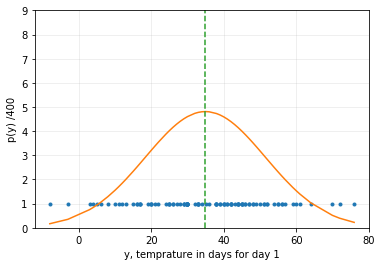

In [15]:

temprature_day_1 = data_csv[:,0]

# 400 to show the distibution curve, play around with it to understand it more
temprature_normal_dist = normal_pdf(temprature_day_1,0,0) *200
temprature_normal_dist_mean = normal_pdf_singleval(np.mean(temprature_day_1), np.mean(temprature_day_1), np.std(temprature_day_1)) *400
zip_temprature_normal_dist = zip(temprature_day_1, temprature_normal_dist)
zip_temprature_normal_dist = np.array(sorted(zip_temprature_normal_dist))


#temprature_normal_dist_testpts = normal_pdf(test_points, np.mean(temprature_day_1), np.std(temprature_day_1)) *10000

fig3 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(temprature_day_1,np.repeat(1, len(temprature_day_1)),'.')
plt.plot(zip_temprature_normal_dist[:,0],zip_temprature_normal_dist[:,1],'-')
plt.plot([np.mean(temprature_day_1), np.mean(temprature_day_1)], [0, temprature_normal_dist_mean], '--')
plt.xlabel('y, temprature in days for day 1')
plt.ylabel('p(y) /400')
plt.ylim(0,9)
plt.show()


Random points  [70. 72. 42.]
Mean  34.94
Product of probability 5.515610317685614e-06


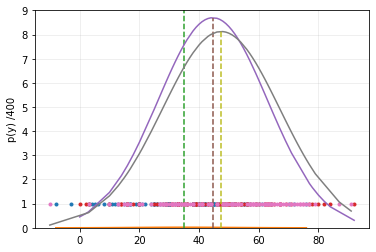

In [12]:

random_index = np.random.randint(0, len(zip_temprature_normal_dist[:,1]), 3)
print('Random points ', zip_temprature_normal_dist[random_index,0])
print('Mean ', np.mean(temprature_day_1))
print('Product of probability', np.product(normal_pdf(zip_temprature_normal_dist[random_index,0],0,0)))


temprature_day_2 = data_csv[:,1]
temprature_normal_dist2 = normal_pdf(temprature_day_2,0,0) *400
temprature_normal_dist_mean2 = normal_pdf_singleval(np.mean(temprature_day_2), np.mean(temprature_day_2), np.std(temprature_day_2)) *400
zip_temprature_normal_dist2 = zip(temprature_day_2, temprature_normal_dist2)
zip_temprature_normal_dist2 = np.array(sorted(zip_temprature_normal_dist2))

temprature_day_3 = data_csv[:,2]
temprature_normal_dist3 = normal_pdf(temprature_day_3,0,0) *400
temprature_normal_dist_mean3 = normal_pdf_singleval(np.mean(temprature_day_3), np.mean(temprature_day_3), np.std(temprature_day_3)) *400
zip_temprature_normal_dist3 = zip(temprature_day_3, temprature_normal_dist3)
zip_temprature_normal_dist3 = np.array(sorted(zip_temprature_normal_dist3))

#temprature_normal_dist_testpts = normal_pdf(test_points, np.mean(temprature_day_1), np.std(temprature_day_1)) *10000

fig4 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(temprature_day_1,np.repeat(1, len(temprature_day_1)),'.')
plt.plot(zip_temprature_normal_dist[:,0],zip_temprature_normal_dist[:,1],'-')
plt.plot([np.mean(temprature_day_1), np.mean(temprature_day_1)], [0, temprature_normal_dist_mean], '--')
plt.plot(temprature_day_2,np.repeat(1, len(temprature_day_2)),'.')
plt.plot(zip_temprature_normal_dist2[:,0],zip_temprature_normal_dist2[:,1],'-')
plt.plot([np.mean(temprature_day_2), np.mean(temprature_day_2)], [0, temprature_normal_dist_mean2], '--')
plt.plot(temprature_day_3,np.repeat(1, len(temprature_day_3)),'.')
plt.plot(zip_temprature_normal_dist3[:,0],zip_temprature_normal_dist3[:,1],'-')
plt.plot([np.mean(temprature_day_3), np.mean(temprature_day_3)], [0, temprature_normal_dist_mean3], '--')

plt.ylabel('p(y) /400')
plt.ylim(0,9)
plt.show()

In [13]:
data = np.matrix(data.flatten())
data = np.insert(data, 0, 1, axis=0).T
Y_mean = np.mean(data, axis = 1)
val1 = np.linalg.inv(np.dot(data.T, data))
val2 = np.dot(data.T,Y_mean)
theta_analytical = np.dot(val1, val2)
Y_prediction = np.dot(data, theta_analytical)